<a href="https://colab.research.google.com/github/KeZhang215/AB_Test_Categorical_CountData/blob/main/ABTest_Marketing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("faviovaz/marketing-ab-testing")

print("Path to dataset files:", path)

100%|██████████| 5.23M/5.23M [00:00<00:00, 73.6MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/faviovaz/marketing-ab-testing/versions/1


In [2]:
!pip install opendatasets
import opendatasets as od
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
od.download('https://www.kaggle.com/datasets/faviovaz/marketing-ab-testing')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: jamzhang122
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/faviovaz/marketing-ab-testing


100%|██████████| 5.23M/5.23M [00:00<00:00, 829MB/s]

# Data Manipulation & Feature Engineering

Data dictionary:

* Index: Row index
* user id: User ID (unique)
* test group: If "ad" the person saw the advertisement, if "psa" they only saw the public service announcement
* converted: If a person bought the product then True, else is False
* total ads: Amount of ads seen by person
* most ads day: Day that the person saw the biggest amount of ads
* most ads hour: Hour of day that the person saw the biggest amount of ads

In [4]:
df = pd.read_csv('/content/marketing-ab-testing/marketing_AB.csv').set_index('Unnamed: 0')
df.index.name = 'index'
df

,user id,test group,converted,total ads,most ads day,most ads hour
index,,,,,,
0,1069124,ad,False,130,Monday,20
1,1119715,ad,False,93,Tuesday,22
2,1144181,ad,False,21,Tuesday,18
3,1435133,ad,False,355,Tuesday,10
4,1015700,ad,False,276,Friday,14
...,...,...,...,...,...,...
588096,1278437,ad,False,1,Tuesday,23
588097,1327975,ad,False,1,Tuesday,23
588098,1038442,ad,False,3,Tuesday,23


In [11]:
df.rename(
    columns={
        'user id' : 'user_id',
        'test group': 'test_group',
        'total ads' : 'total_ads',
        'most ads day' : 'most_ads_day',
        'most ads hour' : 'most_ads_hour',
    },
    inplace=True
)
df.head()

,user_id,test_group,converted,total_ads,most_ads_day,most_ads_hour
index,,,,,,
0,1069124,ad,False,130,Monday,20
1,1119715,ad,False,93,Tuesday,22
2,1144181,ad,False,21,Tuesday,18
3,1435133,ad,False,355,Tuesday,10
4,1015700,ad,False,276,Friday,14


In [12]:
psa_controlGroup = df[df['test_group']=='psa'].copy()
psa_controlGroup

,user_id,test_group,converted,total_ads,most_ads_day,most_ads_hour
index,,,,,,
18,900681,psa,False,248,Saturday,19
38,905704,psa,False,27,Thursday,8
68,904595,psa,False,13,Tuesday,19
140,901904,psa,False,32,Wednesday,19
157,902234,psa,False,105,Tuesday,19
...,...,...,...,...,...,...
588052,900959,psa,False,16,Tuesday,22
588063,902828,psa,False,3,Tuesday,22
588066,914578,psa,False,1,Tuesday,22


In [13]:
ad_testGroup = df[df['test_group']=='ad'].copy()
ad_testGroup

,user_id,test_group,converted,total_ads,most_ads_day,most_ads_hour
index,,,,,,
0,1069124,ad,False,130,Monday,20
1,1119715,ad,False,93,Tuesday,22
2,1144181,ad,False,21,Tuesday,18
3,1435133,ad,False,355,Tuesday,10
4,1015700,ad,False,276,Friday,14
...,...,...,...,...,...,...
588096,1278437,ad,False,1,Tuesday,23
588097,1327975,ad,False,1,Tuesday,23
588098,1038442,ad,False,3,Tuesday,23


* Conversion Rate = total true / total converted
* most_ads_day and most_ads_hour visuals

In [16]:
# Calculate Conversion Rate For Both Groups

ad_conversion_rate = (ad_testGroup['converted'].sum() / len(ad_testGroup)) * 100
psa_conversion_rate = (psa_controlGroup['converted'].sum() / len(psa_controlGroup)) * 100

print(f"Ad Test Group Conversion Rate: {ad_conversion_rate:.2f}%")
print(f"PSA Control Group Conversion Rate: {psa_conversion_rate:.2f}%")

Ad Test Group Conversion Rate: 2.55%
PSA Control Group Conversion Rate: 1.79%


Use `sns.histplot` with only the `x` variable to show the frequency. The y-axis will automatically represent the count of occurrences for each category in your x-variable.

To make the plot more informative, we can order the days of the week chronologically.

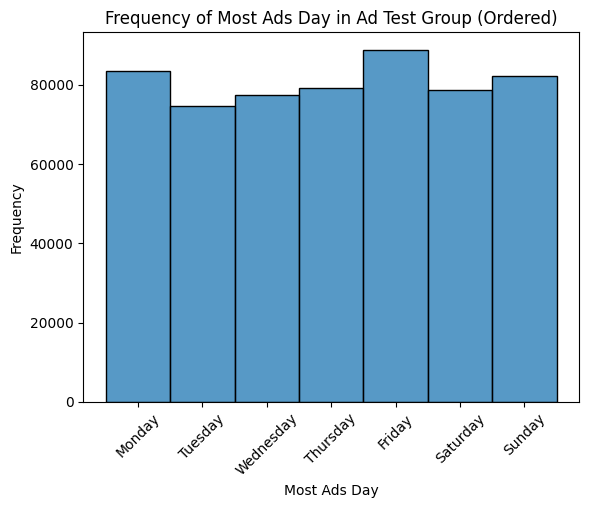

In [14]:
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Convert 'most_ads_day' to a categorical type with the specified order
ad_testGroup['most_ads_day'] = pd.Categorical(
    ad_testGroup['most_ads_day'],
    categories=day_order,
    ordered=True
)

# Now plot with the ordered days
sns.histplot(data=ad_testGroup, x='most_ads_day')
plt.title('Frequency of Most Ads Day in Ad Test Group (Ordered)')
plt.xlabel('Most Ads Day')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

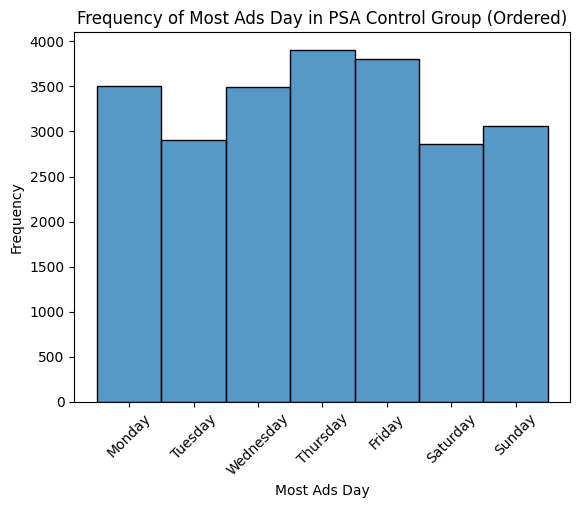

In [15]:
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Convert 'most_ads_day' to a categorical type with the specified order
psa_controlGroup['most_ads_day'] = pd.Categorical(
    psa_controlGroup['most_ads_day'],
    categories=day_order,
    ordered=True
)

# Now plot with the ordered days
sns.histplot(data=psa_controlGroup, x='most_ads_day')
plt.title('Frequency of Most Ads Day in PSA Control Group (Ordered)')
plt.xlabel('Most Ads Day')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

# A/B Testing

Run AB test on conversion rate, total_ads, and most_ads_hour:
* Descriptive Statistics
* Visuals
* Two-proportion z-test for conversion (bar chart)
* Mann-Whitney U test for total_ads (ECDF) and most_ads_hour (proportion bar chart by hour)
* Report effect sizes + confidence intervals

## Analyze Conversion Rate

Perform an A/B test analysis on the 'converted' column using the existing dataframes `ad_testGroup` and `psa_controlGroup`.

1.  **Descriptive Statistics**: Calculate and print the sample size ($n$), number of conversions, and conversion rate for both groups.
2.  **Visualization**: Generate a bar chart comparing the conversion rates of the two groups.
3.  **Statistical Test**: Perform a Two-proportion z-test to determine if the difference in conversion rates is statistically significant.
4.  **Effect Size & CI**: Calculate and report **Cohen's h** as the effect size and compute the **95% confidence interval** for the difference in proportions.


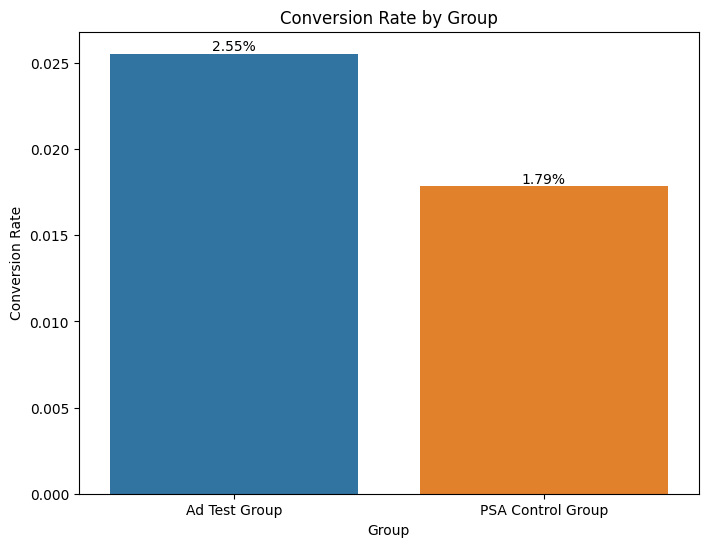


--- Descriptive Statistics ---
Ad Group:  n = 564577, conversions = 14423, proportion = 0.0255
PSA Group: n = 23524, conversions = 420, proportion = 0.0179

--- Statistical Analysis Results ---
Z-statistic: 7.3701
P-value:     1.705e-13
Cohen's h:   0.0530
95% CI for difference (Ad - PSA): (0.0060, 0.0094)

Conclusion: The difference in conversion rates is statistically significant at alpha=0.05.


In [25]:
from statsmodels.stats.proportion import proportions_ztest, confint_proportions_2indep

# 1. Calculate Descriptive Statistics
n_ad = len(ad_testGroup)
conv_ad = ad_testGroup['converted'].sum()
prop_ad = conv_ad / n_ad

n_psa = len(psa_controlGroup)
conv_psa = psa_controlGroup['converted'].sum()
prop_psa = conv_psa / n_psa

# 2. Visualization
plot_data = pd.DataFrame({
    'Group': ['Ad Test Group', 'PSA Control Group'],
    'Conversion Rate': [prop_ad, prop_psa]
})

plt.figure(figsize=(8, 6))
sns.barplot(data=plot_data, x='Group', y='Conversion Rate', hue='Group', legend=False)
plt.title('Conversion Rate by Group')
plt.ylabel('Conversion Rate')
# Add text labels on bars
for i, v in enumerate(plot_data['Conversion Rate']):
    plt.text(i, v, f'{v:.2%}', ha='center', va='bottom')
plt.show()

# 3 & 4. Two-proportion z-test
counts = np.array([conv_ad, conv_psa])
nobs = np.array([n_ad, n_psa])

z_stat, p_val = proportions_ztest(counts, nobs)

# 5. Calculate Cohen's h
# h = 2 * (arcsin(sqrt(p1)) - arcsin(sqrt(p2)))
h = 2 * (np.arcsin(np.sqrt(prop_ad)) - np.arcsin(np.sqrt(prop_psa)))

# 6. Confidence Interval (95% for difference)
# method='wald' is standard for large samples
ci_lower, ci_upper = confint_proportions_2indep(conv_ad, n_ad, conv_psa, n_psa, method='wald', compare='diff')

# 7. Print Results
print("\n--- Descriptive Statistics ---")
print(f"Ad Group:  n = {n_ad}, conversions = {conv_ad}, proportion = {prop_ad:.4f}")
print(f"PSA Group: n = {n_psa}, conversions = {conv_psa}, proportion = {prop_psa:.4f}")

print("\n--- Statistical Analysis Results ---")
print(f"Z-statistic: {z_stat:.4f}")
print(f"P-value:     {p_val:.4g}")
print(f"Cohen's h:   {h:.4f}")
print(f"95% CI for difference (Ad - PSA): ({ci_lower:.4f}, {ci_upper:.4f})")

if p_val < 0.05:
    print("\nConclusion: The difference in conversion rates is statistically significant at alpha=0.05.")
else:
    print("\nConclusion: The difference in conversion rates is NOT statistically significant at alpha=0.05.")

## Findings
* For conversion rates, the null hypothesis is
H0: p_ad = p_psa
z = 7.37 is extremely large, corresponding to extremely small p-value, hence rejecting the null hypothesis. Also, a large z-score means the effect is statistically reliable.
So the difference is very unlikely to be due to chance or noise.

* Cohen's h = 0.053.
For proportions, the effect size scale is for example h=0.2 small effect, h=0.5 median, h=0.8 large.
Even though in this case 0.053 is a small effect, but with very large N and real business metrics, small effect sizes can be operationally significant.

* We are 95% confident the Ad test group converts 0.6% to 0.94% higher than PSA.

So, conversion rate shows both a statistically significant and practically meaningful difference between groups. The Ad Test Group achieved a 2.55% conversion rate compared to 1.79% in the PSA Control Group, representing an approximate 42% relative lift. The two-proportion z-test confirms this difference is highly significant (p < 1e-12), and the confidence interval indicates a real improvement of 0.6% to 0.94%. Therefore, the Ad variant appears to materially improve conversion outcomes.

## Analyze Total Ads (Mann-Whitney U test + ECDF visual)


--- Descriptive Statistics (total_ads) ---
Ad Group:  Mean=24.82, Median=13.00, Std=43.75
PSA Group: Mean=24.76, Median=12.00, Std=42.86


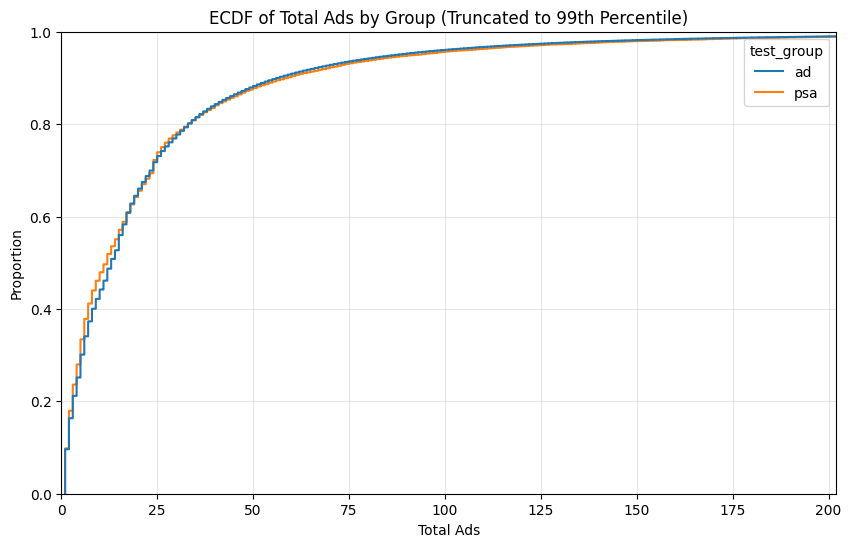


--- Statistical Analysis Results (total_ads) ---
Mann-Whitney U Statistic: 6808288222.0000
P-value: 4.691e-11
Rank-biserial correlation (r): -0.0253
95% CI for difference in means (Ad - PSA): (-0.4973, 0.6217)

Conclusion: There is a statistically significant difference in the distribution of total ads seen between the groups.


In [28]:
from scipy.stats import mannwhitneyu
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Descriptive Statistics
ad_stats = ad_testGroup['total_ads'].describe()
psa_stats = psa_controlGroup['total_ads'].describe()

print("--- Descriptive Statistics (total_ads) ---")
print(f"Ad Group:  Mean={ad_stats['mean']:.2f}, Median={ad_stats['50%']:.2f}, Std={ad_stats['std']:.2f}")
print(f"PSA Group: Mean={psa_stats['mean']:.2f}, Median={psa_stats['50%']:.2f}, Std={psa_stats['std']:.2f}")

# 2. Visualization: ECDF
plt.figure(figsize=(10, 6))
# Calculate 99th percentile for x-axis limit
percentile_99 = np.percentile(pd.concat([ad_testGroup['total_ads'], psa_controlGroup['total_ads']]), 99)

sns.ecdfplot(data=df, x='total_ads', hue='test_group')
plt.xlim(0, percentile_99)
plt.title('ECDF of Total Ads by Group (Truncated to 99th Percentile)')
plt.xlabel('Total Ads')
plt.ylabel('Proportion')
plt.grid(True, alpha=0.3)
plt.show()

# 3. Mann-Whitney U Test
stat, p_val = mannwhitneyu(ad_testGroup['total_ads'], psa_controlGroup['total_ads'])

# 4. Effect Size (Rank-biserial correlation)
n1 = len(ad_testGroup)
n2 = len(psa_controlGroup)
r = 1 - (2 * stat) / (n1 * n2)

# 5. Confidence Interval for Difference in Means
mean_ad = ad_stats['mean']
std_ad = ad_stats['std']
mean_psa = psa_stats['mean']
std_psa = psa_stats['std']

se_diff = np.sqrt((std_ad**2 / n1) + (std_psa**2 / n2))
ci_lower = (mean_ad - mean_psa) - 1.96 * se_diff
ci_upper = (mean_ad - mean_psa) + 1.96 * se_diff

# Print Results
print("\n--- Statistical Analysis Results (total_ads) ---")
print(f"Mann-Whitney U Statistic: {stat:.4f}")
print(f"P-value: {p_val:.4g}")
print(f"Rank-biserial correlation (r): {r:.4f}")
print(f"95% CI for difference in means (Ad - PSA): ({ci_lower:.4f}, {ci_upper:.4f})")

if p_val < 0.05:
    print("\nConclusion: There is a statistically significant difference in the distribution of total ads seen between the groups.")
else:
    print("\nConclusion: There is NO statistically significant difference in the distribution of total ads seen between the groups.")

## Findings
* Mann-Whitney is very sensitive with large N since it does not compare means and compares all pairwise ranks across groups. If you have thousands of observations in each group, even a very tiny systematic shift (like 1-2 ranks on average) gives you a huge U statistic, or tiny p-value.
p-values mislead me, effect size gives the truth.

* 95% CI of (Ad - PSA): (-0.4973, 0.6217), the average difference is probably between -0.5 and +0.6 total ads. Basically no difference.

So, for large sample size, the Mann-Whitney U will detect even microscopic differences; Any small rank shifts accumulate even if the ECDF plots look visually identical; With big N, the p-value is almost always tiny, even if the difference is meaningless.

## Analyze Most Ads Hour (Mann-Whitney U test + Proportion Bar Chart)


--- Descriptive Statistics (most_ads_hour) ---
Ad Group:  Mean=14.48, Median=14.00, Std=4.84
PSA Group: Mean=14.30, Median=14.00, Std=4.66


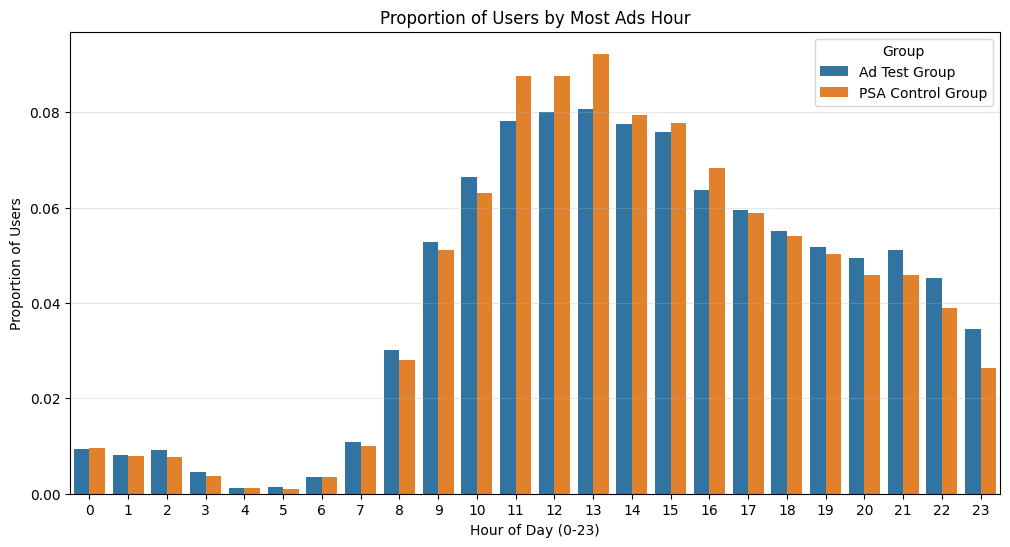


--- Statistical Analysis Results (most_ads_hour) ---
Mann-Whitney U Statistic: 6787206342.0000
P-value: 8.413e-09
Rank-biserial correlation (r): -0.0221
95% CI for difference in means (Ad - PSA): (0.1101, 0.2318)

Conclusion: There is a statistically significant difference in the distribution of the hour when most ads were seen between the groups.


In [29]:
# 1. Descriptive Statistics
ad_hour_stats = ad_testGroup['most_ads_hour'].describe()
psa_hour_stats = psa_controlGroup['most_ads_hour'].describe()

print("--- Descriptive Statistics (most_ads_hour) ---")
print(f"Ad Group:  Mean={ad_hour_stats['mean']:.2f}, Median={ad_hour_stats['50%']:.2f}, Std={ad_hour_stats['std']:.2f}")
print(f"PSA Group: Mean={psa_hour_stats['mean']:.2f}, Median={psa_hour_stats['50%']:.2f}, Std={psa_hour_stats['std']:.2f}")

# 2. Visualization: Proportion Bar Chart by Hour
# Calculate proportions
ad_hour_counts = ad_testGroup['most_ads_hour'].value_counts(normalize=True).sort_index()
psa_hour_counts = psa_controlGroup['most_ads_hour'].value_counts(normalize=True).sort_index()

# Create a DataFrame for plotting
plot_data = pd.DataFrame({
    'Hour': list(ad_hour_counts.index) + list(psa_hour_counts.index),
    'Proportion': list(ad_hour_counts.values) + list(psa_hour_counts.values),
    'Group': ['Ad Test Group'] * len(ad_hour_counts) + ['PSA Control Group'] * len(psa_hour_counts)
})

plt.figure(figsize=(12, 6))
sns.barplot(data=plot_data, x='Hour', y='Proportion', hue='Group')
plt.title('Proportion of Users by Most Ads Hour')
plt.xlabel('Hour of Day (0-23)')
plt.ylabel('Proportion of Users')
plt.legend(title='Group')
plt.grid(axis='y', alpha=0.3)
plt.show()

# 3. Mann-Whitney U Test
stat_hour, p_val_hour = mannwhitneyu(ad_testGroup['most_ads_hour'], psa_controlGroup['most_ads_hour'])

# 4. Effect Size (Rank-biserial correlation)
n1 = len(ad_testGroup)
n2 = len(psa_controlGroup)
r_hour = 1 - (2 * stat_hour) / (n1 * n2)

# 5. Confidence Interval for Difference in Means
mean_ad_hour = ad_hour_stats['mean']
std_ad_hour = ad_hour_stats['std']
mean_psa_hour = psa_hour_stats['mean']
std_psa_hour = psa_hour_stats['std']

se_diff_hour = np.sqrt((std_ad_hour**2 / n1) + (std_psa_hour**2 / n2))
ci_lower_hour = (mean_ad_hour - mean_psa_hour) - 1.96 * se_diff_hour
ci_upper_hour = (mean_ad_hour - mean_psa_hour) + 1.96 * se_diff_hour

# Print Results
print("\n--- Statistical Analysis Results (most_ads_hour) ---")
print(f"Mann-Whitney U Statistic: {stat_hour:.4f}")
print(f"P-value: {p_val_hour:.4g}")
print(f"Rank-biserial correlation (r): {r_hour:.4f}")
print(f"95% CI for difference in means (Ad - PSA): ({ci_lower_hour:.4f}, {ci_upper_hour:.4f})")

if p_val_hour < 0.05:
    print("\nConclusion: There is a statistically significant difference in the distribution of the hour when most ads were seen between the groups.")
else:
    print("\nConclusion: There is NO statistically significant difference in the distribution of the hour when most ads were seen between the groups.")

## Findings
### The bar chart shows that for every hour from 0 to 23, the proportions of users in the Ad group vs PSA group overlap extremely closely.

* No obvious difference.
* No shift in peak hours.
* No different spread.

This is what called practically indistinguishable distributions.

Means and medians are almost the same, difference in means = 0.18 hours, which is about 11 minutes. This is effectively nothing from a business or user-behavior perspective.

This is the same phenomenon with total_ads:
* Statistically detectable
* Practically meaningless
* Caused by massive sample size
* Effect size near zero
* Visual distributions nearly identical

Effect size interpretation (r), for example, r=0.1 is small effect, r>0.5 is huge effect. And effect of 0.022 is very close to zero with no effect.

The 95% CI for difference in means of (0.1101, 0.2318) indicates that the average difference in the hour is probably between 0.11 and 0.23 hours, this is not practically meaningful.

As a result, we can say although the Mann-Whitney U test reports a statistically significant difference in most_ads_hour between groups, the effect size is extremely small (r ≈ 0.022), and the visual distributions are nearly identical. Therefore, the difference is not practically meaningful even though it is statistically detectable due to the large sample size.


## Summary:

### Data Analysis Key Findings

*   **Conversion Rate Analysis ('converted'):**
    *   The Ad Test Group achieved a significantly higher conversion rate ($\approx 2.55\%$) compared to the PSA Control Group ($\approx 1.79\%$).
    *   The difference is statistically significant with a Z-statistic of **7.3701** and a p-value of **$1.705 \times 10^{-13}$**.
    *   The effect size (Cohen's h) is **0.0530**, indicating a small but positive effect. The 95% Confidence Interval for the difference is **(0.0060, 0.0094)**.

*   **Total Ads Analysis ('total_ads'):**
    *   The Ad Group had a slightly higher median number of ads viewed (**13.00**) compared to the PSA Group (**12.00**), though the means were very similar (**24.82** vs **24.76**).
    *   The Mann-Whitney U test confirms a statistically significant difference in distributions (p-value: **$4.69 \times 10^{-11}$**), though the effect size (Rank-biserial correlation) is negligible (**-0.0253**).

*   **Peak Hour Analysis ('most_ads_hour'):**
    *   The Ad Group tended to view the most ads slightly later in the day (Mean hour: **14.48**) compared to the PSA Group (Mean hour: **14.30**).
    *   This difference is statistically significant (p-value: **$8.41 \times 10^{-9}$**), but practically small with a very low effect size (Rank-biserial correlation: **-0.0221**).

### Insights or Next Steps

*   **Campaign Effectiveness:** The primary goal was achieved; the ad campaign drives a statistically significant lift in conversions compared to the PSA control group, validating the campaign's success.
*   **Sample Size Influence:** While all tested features showed statistically significant differences, the Effect Sizes (Cohen's h and Rank-biserial $r$) were small to negligible. This suggests that the high level of significance ($p < 0.05$) is largely driven by the massive sample size ($n > 500,000$) rather than drastic behavioral differences in ad frequency or timing.
